#  Predictive Model for Seizure Detection in Epilectic Patients

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook,reset_output,save,show
import numpy as np
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from collections import Counter
from sklearn.ensemble import ExtraTreesClassifier
from operator import itemgetter
from heapq import nlargest, nsmallest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import time

import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [141]:
from sklearn.model_selection import StratifiedKFold

In [59]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv")

In [48]:
print(data.shape)
print("\n", '-'*100)
print(data.info())


(11500, 179)

 ----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to Is_Seizure
dtypes: int64(179)
memory usage: 15.7 MB
None


In [47]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,Is_Seizure
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In the data, each of the 178 columns is the value of EEG recording for 1 second. People are grouped into 5 different groups based on the inputs coming from the EEG recordings. If we show the groups with a range of numbers from 1 to 5;


 -  1: This group represents epileptic patients who experienced epileptic seizures during the EEG recording.
 - 2-3: These groups represent epileptic patients who did not experience a seizure during the EEG recording. The difference between these groups is that EEG is recorded from different areas of the brain.
 - 4: This group represents healthy participants who did not experience a seizure and their eyes were open during EEG recording.
 - 5: This group represents healthy participants who did not experience a seizure and their eyes were closed during EEG recording.
 
 
Since the detection of epileptic seizures is the main focus of this project, these five groups can be divided into two groups based on the epileptic seizure activity. The people who are grouped in classes 2,3,4, and 5 are the ones whose EEG recording does not show any epileptic seizure activity during the recording and those people will be labeled as 0. The people who are grouped in class 1, on the other hand, had some seizure activity during recording and they will be __labeled as 1__.



In [18]:
class_for_stratification = data['y']

In [60]:
data['Is_Seizure'] = data['y'].apply(lambda x: 1 if x==1 else 0)

In [61]:
data.drop(columns = ['Unnamed: 0', 'y'], axis = 1, inplace = True)

In [62]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,Is_Seizure
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [13]:
features = data.columns[0:178]
X = data.loc[:, features].values
y = data.loc[:,"Is_Seizure"]
classess= class_for_stratification.
X = StandardScaler().fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123, stratify = y)

In [25]:
type(class_for_stratification)

pandas.core.series.Series

In [27]:
X

array([[ 0.88505134,  1.20992878,  1.46276429, ..., -0.63414367,
        -0.43329036, -0.23539922],
       [ 2.40057718,  2.36619038,  2.23944096, ...,  1.02342937,
         0.95424076,  0.85653664],
       [-0.12328657, -0.16915405, -0.22513147, ..., -0.13687176,
        -0.13859348, -0.14440456],
       ...,
       [ 0.1544592 ,  0.10184476, -0.01720228, ...,  0.0657205 ,
         0.07015014,  0.02545213],
       [-0.17159018, -0.08484331,  0.00725997, ...,  0.49546166,
         0.43852123,  0.40762968],
       [ 0.24502848,  0.31262161,  0.41088722, ...,  0.0657205 ,
         0.08856869,  0.19530882]])

## __Principal Component Analysis for Data Visualization__



To get an idea about the distribution of the classes, the data can be visualized after reducing the number of features from 178 to only 2. Principal Component Analysis is one of the most widely used approaches in this dimensionality reduction process and I will use it to visualize the data.

In [38]:
output_notebook()
def pca_visualization(X,y):
    pca = PCA(n_components = 2)
    pc = pca.fit_transform(X)
    pcDF = pd.DataFrame(data = pc, columns = ['pc1','pc2'])
    pcDF['e'] = y.values
    epilepsy = pcDF.loc[pcDF['e']==1,]
    not_epilepsy = pcDF.loc[pcDF['e']==0,]
    reset_output()
    output_notebook()
    p = figure()
    p.scatter(x = epilepsy['pc1'], 
              y = epilepsy['pc2'], 
              marker="x", 
              fill_alpha=0.5, 
              size=6, 
              legend = "Epilepsy")
    p.scatter(x = not_epilepsy['pc1'], 
              y = not_epilepsy['pc2'], 
              marker="triangle", 
              fill_alpha=0.3, 
              size=6, 
              fill_color="orange",
              line_color="orange",
              legend = "Not Epilepsy")
    p.xaxis.axis_label = "Principal Component 1"
    p.yaxis.axis_label = "Principal Component 2"
    show(p)

Loading BokehJS ...

In [46]:

pca_visualization(X_train,y_train)

Loading BokehJS ...

In [74]:
#check for class imbalace in the dataset

print('class 0:', y_train.value_counts()[0]/len(y_train)*100, '%')
print('class 0:', y_train.value_counts()[1]/len(y_train)*100, '%')

class 0: 80.0 %
class 0: 20.0 %


As the non-epileptic seizures cases are much higher than eplicy cases in the data it is an imbalanced dataset, we will use  SMOTE over sampling method to balance the class before doing modeling on it

## Over-Sampling with SMOTE

SMOTE is one of the most commonly used oversampling techniques which simply synthesizes new data for the minority classes to obtain an equal number of cases for each label. It is important to note that the algorithm should be used only for training dataset to prevent bias.

In [72]:
oversampling = SMOTE()
X_train_b, y_train_b = oversampling.fit_resample(X_train,y_train)

counter_imb = Counter(y_train)
counter_b = Counter(y_train_b)

print(counter_imb)
print(counter_b)

Counter({0: 7360, 1: 1840})
Counter({1: 7360, 0: 7360})


Now the look __balanced__.

In [144]:
pca_visualization(X_train_b,y_train_b)

Loading BokehJS ...

Wecan see the blue cross which represent ' epileptic seizures' cases are more more dense in this plot compared to the previous plot

Now as we have 178 features as of now it will be too much, also the 2 principal components will be too less to build a appropriate model, so will will come to a middl path and will take sutable numebr for features. Lets take around 30 principal components that will be able to explain most of the variance but will not make the model very complex by avoiding too many features

In [95]:
pca = PCA(n_components = 30)
pca.fit(X)

PCA(n_components=30)

In [96]:
X_train_30_pca = pca.transform(X_train)
X_test_30_pca = pca.transform(X_test)

In [90]:
X_train_30_pca.shape

(9200, 30)

## Modeling

### 1. Random Forest Model

In [217]:
rf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1)
rf.fit(X_train_30_pca, y_train)

RandomForestClassifier(max_depth=4, n_estimators=500, n_jobs=-1)

In [206]:
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_test_30_pca)[None, :])

In [207]:
predictions = np.vstack(predictions)

In [101]:
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]

In [208]:
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))

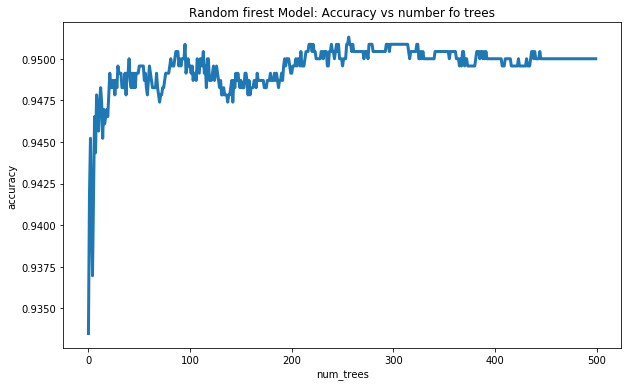

In [209]:

plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy')
plt.title("Random firest Model: Accuracy vs number fo trees");

We see, that 200 trees are already sufficient to have stable result.Hence model converges relatively faster. This is an important insight from further tuning point of view. We can use much smaller calue of N-tree(like 200) to get the similar accuracy.

In [218]:
predictions = rf.predict(X_test_30_pca)

In [219]:
y_test.shape, predictions.shape

((2300,), (2300,))

In [222]:
accuracy_rf = accuracy_score(y_test, predictions)
print("Accuracy Random Forest: %.2f%%" % (accuracy_rf * 100.0))

Accuracy Random Forest: 95.04%


## XG Boost Model

Lets try a couple of models with differnt hyperparameters to get  a sense of computation tome, accuracy percentage. This will help us in deciding the right course of action to fine tune the model to get a better accuracy

## XG Boost model 1: smaller max depth 

In [125]:
model = XGBClassifier(
    max_depth=5,
    n_estimators=300,
    min_child_weight=0.5, 
    colsample_bytree=0.7, 
    subsample=0.7, 
    eta=0.01,
    #tree_method='gpu_hist',
    reg_lambda =5,
    n_jobs =-1,
    seed=123)


In [127]:
ts = time.time()
model.fit(
    X_train_30_pca, 
    y_train, 
    eval_metric="error", 
    eval_set=[(X_train_30_pca, y_train), (X_test_30_pca, y_test)], 
    verbose=True, 
    early_stopping_rounds = 30)

time.time() - ts

[0]	validation_0-error:0.05196	validation_1-error:0.05913
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.05402	validation_1-error:0.05783
[2]	validation_0-error:0.04000	validation_1-error:0.05044
[3]	validation_0-error:0.04239	validation_1-error:0.05609
[4]	validation_0-error:0.04065	validation_1-error:0.05261
[5]	validation_0-error:0.04206	validation_1-error:0.05217
[6]	validation_0-error:0.03967	validation_1-error:0.05087
[7]	validation_0-error:0.04043	validation_1-error:0.05087
[8]	validation_0-error:0.04043	validation_1-error:0.05087
[9]	validation_0-error:0.03978	validation_1-error:0.05174
[10]	validation_0-error:0.03870	validation_1-error:0.05044
[11]	validation_0-error:0.03783	validation_1-error:0.04826
[12]	validation_0-error:0.03641	validation_1-error:0.04739
[13]	validation_0-error:0.03620	validation_1-error:0.04696
[14]	validation_0-error

0.5295848846435547

In [128]:
y_pred = model.predict(X_test_30_pca)  
predictions = [round(value) for value in y_pred]

In [129]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.48%


## XG Boost model 2: smaller max depth 

In [135]:
model = XGBClassifier(
    max_depth=7,
    n_estimators=300,
    min_child_weight=0.3, 
    colsample_bytree=0.7, 
    subsample=0.7, 
    eta=0.01,
    #tree_method='gpu_hist',
    reg_lambda =5,
    n_jobs =-1,
    seed=123)

In [136]:

model.fit(
    X_train_30_pca, 
    y_train, 
    eval_metric="error", 
    eval_set=[(X_train_30_pca, y_train), (X_test_30_pca, y_test)], 
    verbose=True, 
    early_stopping_rounds = 30)


[0]	validation_0-error:0.03946	validation_1-error:0.04913
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.04174	validation_1-error:0.04565
[2]	validation_0-error:0.03250	validation_1-error:0.04304
[3]	validation_0-error:0.03315	validation_1-error:0.04391
[4]	validation_0-error:0.03250	validation_1-error:0.04565
[5]	validation_0-error:0.03272	validation_1-error:0.04261
[6]	validation_0-error:0.03076	validation_1-error:0.04130
[7]	validation_0-error:0.03044	validation_1-error:0.04304
[8]	validation_0-error:0.03000	validation_1-error:0.04348
[9]	validation_0-error:0.02967	validation_1-error:0.04174
[10]	validation_0-error:0.02957	validation_1-error:0.04217
[11]	validation_0-error:0.02902	validation_1-error:0.04304
[12]	validation_0-error:0.02935	validation_1-error:0.04391
[13]	validation_0-error:0.02924	validation_1-error:0.04261
[14]	validation_0-error

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.01, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=7,
              min_child_weight=0.3, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1,
              random_state=123, reg_alpha=0, reg_lambda=5, scale_pos_weight=1,
              seed=123, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

## Radomozed GridSearch Method for optimal parameter estimation

In [187]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 10, 15]
        }

In [188]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=300, early_stopping_rounds = 30, Verbose = True)

In [189]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=-1, verbose=True, random_state=1001 )


In [190]:
random_search.fit(X_train_30_pca,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.7min finished


[01:48:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { Verbose, early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(estimator=XGBClassifier(Verbose=True, base_score=None,
                                           booster=None, colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=30, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.01,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_c...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [191]:
print(random_search.best_params_)

{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 15, 'gamma': 1.5, 'colsample_bytree': 0.8}


In [192]:
random_search.best_score_

0.9946538279773158

In [193]:
y_pred = random_search.predict(X_test_30_pca)  
predictions = [round(value) for value in y_pred]

In [194]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.04%


## Conclusion

We build  a couple of models and based on the intial baseline RF model the objective was to build a more sophisticated model which can provide us better accuracy than baseline.

The challenge was to improve on arlead very high accuracy of baseline random forest model ~95%.
He got a significant improvement by finetuning the hyper parameter. Our final model gove a accuracy of __97.04%__ on the test set. Which is a good improvement of __two percentage point__. This could be very beneficial specifically as the objective is related to accuractly identifying a health condition.
We employed powerful randomized grid search method to obtain more optimal parametrs. Randomized grid search has clear advantage over GRIDsearchCV with respect to __computational time__. In random search the time required is much lesser than general Grid search method